In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [32]:
df = pd.read_csv('Spend.csv')

df.head()

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00€,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01€,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00€,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00€,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00€,0,NaN,NaN


In [33]:
df.describe()

,Impressions,Clicks
count,20779.000000,20779.000000
mean,2458.203475,23.990616
std,11442.528075,85.245714
min,0.000000,0.000000
25%,0.000000,0.000000
50%,63.000000,1.000000
75%,709.000000,12.000000
max,431445.000000,2415.000000


In [34]:
text_columns_df = df.select_dtypes(include=['object'])

text_columns_df.describe()

,Date,Source,Campaign,Spend,AdGroup,Ad
count,20779,20779,14785,20779,13951,13951
unique,355,14,51,2859,24,176
top,2024-04-25,Facebook Ads,12.07.2023wide_DE,0.00€,wide,bloggersvideo9com
freq,100,9732,2073,6511,5451,714


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20779 non-null  object
 1   Source       20779 non-null  object
 2   Campaign     14785 non-null  object
 3   Impressions  20779 non-null  int64 
 4   Spend        20779 non-null  object
 5   Clicks       20779 non-null  int64 
 6   AdGroup      13951 non-null  object
 7   Ad           13951 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [36]:
df.dtypes

Date           object
Source         object
Campaign       object
Impressions     int64
Spend          object
Clicks          int64
AdGroup        object
Ad             object
dtype: object

In [ ]:
# Splitting the 'Spend' column into amount and currency
df[['Amount', 'Currency']] = df['Spend'].str.extract(r'([0-9,.]+)\s*([^\d]+)')

# Converting the amount to a numeric format for further use
df['Amount'] = df['Amount'].str.replace(',', '.').astype(float)

# Dropping the original 'Spend' column
df.drop('Spend', axis=1, inplace=True)

df.head()

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
0,2023-07-03,Google Ads,gen_analyst_DE,6,0,NaN,NaN,0.00,€
1,2023-07-03,Google Ads,performancemax_eng_DE,4,1,NaN,NaN,0.01,€
2,2023-07-03,Facebook Ads,NaN,0,0,NaN,NaN,0.00,€
3,2023-07-03,Google Ads,NaN,0,0,NaN,NaN,0.00,€
4,2023-07-03,CRM,NaN,0,0,NaN,NaN,0.00,€


In [38]:
#df['Campaign_Name'] = df['Campaign'].str.extract(r'([a-zA-Z0-9_]+)$')
#df.drop('Campaign', axis=1, inplace=True)

#df.head()

In [39]:
text_columns_df = df.select_dtypes(include=['object'])

text_columns_df.describe()

,Date,Source,Campaign,AdGroup,Ad,Currency
count,20779,20779,14785,13951,13951,20779
unique,355,14,51,24,176,1
top,2024-04-25,Facebook Ads,12.07.2023wide_DE,wide,bloggersvideo9com,€
freq,100,9732,2073,5451,714,20779


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         20779 non-null  object 
 1   Source       20779 non-null  object 
 2   Campaign     14785 non-null  object 
 3   Impressions  20779 non-null  int64  
 4   Clicks       20779 non-null  int64  
 5   AdGroup      13951 non-null  object 
 6   Ad           13951 non-null  object 
 7   Amount       20779 non-null  float64
 8   Currency     20779 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.4+ MB


In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

In [42]:
df.duplicated(subset=['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 
                      'Amount', 'Currency'], keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
20774    False
20775    False
20776    False
20777    False
20778    False
Length: 20779, dtype: bool

In [43]:
df.loc[df.duplicated(subset=['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 
                      'Amount', 'Currency'], keep=False)]

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
753,2023-07-23,Bloggers,NaN,0,0,NaN,NaN,0.0,€
755,2023-07-23,Bloggers,NaN,0,0,NaN,NaN,0.0,€
768,2023-07-24,Bloggers,NaN,0,0,NaN,NaN,0.0,€
789,2023-07-24,Bloggers,NaN,0,0,NaN,NaN,0.0,€
841,2023-07-25,Bloggers,NaN,0,0,NaN,NaN,0.0,€
...,...,...,...,...,...,...,...,...,...
20746,2024-06-21,Facebook Ads,NaN,0,0,NaN,NaN,0.0,€
20750,2024-06-21,SMM,NaN,0,0,NaN,NaN,0.0,€
20764,2024-06-21,Telegram posts,NaN,0,0,NaN,NaN,0.0,€
20770,2024-06-21,Organic,NaN,0,0,NaN,NaN,0.0,€


In [ ]:
df_cleaned = df[~((df['Impressions'] == 0) &
                  (df['Clicks'] == 0) &
                  (df['AdGroup'].isna()) &
                  (df['Ad'].isna()) &
                  (df['Amount'] == 0.0) &
                  (df['Campaign'].isna()))]

print(f"Number of rows after deletion: {len(df_cleaned)}")

Количество строк после удаления: 16988


In [45]:
df_cleaned.head()

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
0,2023-07-03,Google Ads,gen_analyst_DE,6,0,NaN,NaN,0.00,€
1,2023-07-03,Google Ads,performancemax_eng_DE,4,1,NaN,NaN,0.01,€
5,2023-07-03,Facebook Ads,03.07.23women,187,6,women,b3,3.30,€
6,2023-07-03,Facebook Ads,03.07.23women,4,1,women,b1,0.02,€
9,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0,wide,b4,0.58,€


In [46]:
df_cleaned.describe()

,Date,Impressions,Clicks,Amount
count,16988,16988.000000,16988.000000,16988.000000
mean,2024-01-11 19:08:14.184129792,3006.770073,29.344302,8.801710
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000
25%,2023-10-09 00:00:00,10.000000,0.000000,0.070000
50%,2024-01-23 00:00:00,176.000000,4.000000,1.540000
75%,2024-04-12 00:00:00,915.000000,16.000000,7.740000
max,2024-06-21 00:00:00,431445.000000,2415.000000,774.000000
std,NaN,12589.757577,93.442313,29.356091


In [47]:
df_cleaned.loc[df_cleaned.duplicated(subset=['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 
                      'Amount', 'Currency'], keep=False)]

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
13828,2024-03-28,SMM,NaN,0,4,NaN,NaN,0.0,€
13844,2024-03-28,SMM,NaN,0,4,NaN,NaN,0.0,€
15125,2024-04-11,SMM,NaN,0,1,NaN,NaN,0.0,€
15129,2024-04-11,SMM,NaN,0,1,NaN,NaN,0.0,€
16187,2024-04-22,SMM,NaN,0,1,NaN,NaN,0.0,€
16190,2024-04-22,SMM,NaN,0,1,NaN,NaN,0.0,€
16421,2024-04-25,SMM,NaN,0,1,NaN,NaN,0.0,€
16466,2024-04-25,SMM,NaN,0,1,NaN,NaN,0.0,€
16512,2024-04-26,Organic,NaN,0,26,NaN,NaN,0.0,€
16531,2024-04-26,Organic,NaN,0,26,NaN,NaN,0.0,€


In [48]:
df_cleaned = df_cleaned.drop_duplicates(subset=['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 
                      'Amount', 'Currency'], keep=False)

In [49]:
df_cleaned.loc[df_cleaned.duplicated(subset=['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 
                      'Amount', 'Currency'], keep=False)]

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency


In [50]:
df_cleaned.describe()

,Date,Impressions,Clicks,Amount
count,16974,16974.000000,16974.000000,16974.000000
mean,2024-01-11 17:08:22.651113216,3009.250029,29.363085,8.808970
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000
25%,2023-10-09 00:00:00,10.000000,0.000000,0.070000
50%,2024-01-23 00:00:00,177.000000,4.000000,1.540000
75%,2024-04-12 00:00:00,916.000000,16.000000,7.757500
max,2024-06-21 00:00:00,431445.000000,2415.000000,774.000000
std,NaN,12594.652488,93.478244,29.367107


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Clicks       20779 non-null  int64         
 5   AdGroup      13951 non-null  object        
 6   Ad           13951 non-null  object        
 7   Amount       20779 non-null  float64       
 8   Currency     20779 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
# Create a copy of the data where Campaign is not empty
df_filled = df[df['Campaign'].notnull()].copy()

# Extract features from the date
df_filled['Year'] = df_filled['Date'].dt.year
df_filled['Month'] = df_filled['Date'].dt.month
df_filled['Day'] = df_filled['Date'].dt.day

# Separate categorical and numerical features
categorical_cols = ['Source', 'AdGroup', 'Currency']
numeric_cols = ['Year', 'Month', 'Day', 'Impressions', 'Clicks', 'Amount']

# Define features (X) and target variable (y)
X = df_filled[categorical_cols + numeric_cols]
y = df_filled['Campaign']

# Apply OneHotEncoder for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

# Create a pipeline with RandomForestClassifier
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Prediction on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show example predictions
print(f"Predictions: {y_pred[:5]}")

Accuracy: 91.92%
Predictions: ['12.09.23interests_Uxui_DE' '12.09.23interests_Uxui_DE'
 '12.07.2023wide_DE' '07.07.23LAL_DE' '30.11.23wide_DE']


In [ ]:
# Create a copy of the dataframe where 'Campaign' is empty
df_missing = df[df['Campaign'].isnull()].copy()

# Extract features from the date
df_missing['Year'] = df_missing['Date'].dt.year
df_missing['Month'] = df_missing['Date'].dt.month
df_missing['Day'] = df_missing['Date'].dt.day

# Select the same features as for model training
X_missing = df_missing[categorical_cols + numeric_cols]

# Apply the pipeline to predict missing values
df_missing['Campaign'] = model_pipeline.predict(X_missing)

# Remove temporary columns Year, Month, Day
df_missing = df_missing.drop(columns=['Year', 'Month', 'Day'])

# Insert predicted values back into the original dataframe
df_filled_in = pd.concat([df_filled, df_missing], ignore_index=True)

# Remove temporary columns from the merged dataframe
df_filled_in = df_filled_in.drop(columns=['Year', 'Month', 'Day'], errors='ignore')

# Check the result
df_filled_in.info()
print(df_filled_in[['Campaign']].isnull().sum())  # Check that there are no more missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     20779 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Clicks       20779 non-null  int64         
 5   AdGroup      13951 non-null  object        
 6   Ad           13951 non-null  object        
 7   Amount       20779 non-null  float64       
 8   Currency     20779 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.4+ MB
Campaign    0
dtype: int64


In [ ]:
# Check rows where there are clicks, but Impressions = 0 or NaN, and Amount = 0 or NaN
invalid_impressions_clicks = df[(df['Impressions'] == 0) | (df['Impressions'].isna()) & (df['Clicks'] > 0) & ((df['Amount'] == 0) | (df['Amount'].isna()))]
print("Rows with Impressions = 0 or NaN, Clicks > 0 and Amount = 0 or NaN")
display(invalid_impressions_clicks)

# Check rows where Impressions, Clicks and Amount are all 0 or NaN
invalid_all_zero = df[(df['Impressions'] == 0) | (df['Impressions'].isna()) & (df['Clicks'] == 0) | (df['Clicks'].isna()) & (df['Amount'] == 0) | (df['Amount'].isna())]
print("Rows with Impressions, Clicks and Amount = 0 or NaN")
display(invalid_all_zero)

# Remove rows with clicks > 0, but Impressions = 0 or NaN and Amount = 0 or NaN from the original table df
df = df[~((df['Clicks'] > 0) & ((df['Impressions'] == 0) | (df['Impressions'].isna())) & ((df['Amount'] == 0) | (df['Amount'].isna())))]

# Remove rows where Impressions, Clicks and Amount are all 0 or NaN from the original table df
df = df[~(((df['Impressions'] == 0) | (df['Impressions'].isna())) & ((df['Clicks'] == 0) | (df['Clicks'].isna())) & ((df['Amount'] == 0) | (df['Amount'].isna())))]

# Check remaining rows after deletion for a complete check
remaining_invalid = df[(df['Impressions'] == 0) | (df['Impressions'].isna()) | (df['Clicks'] == 0) | (df['Clicks'].isna()) | (df['Amount'] == 0) | (df['Amount'].isna())]
print("Remaining rows with missing values:")
display(remaining_invalid)

Строки с Impressions = 0 или NaN, Clicks > 0 и Amount = 0 или NaN


,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
2,2023-07-03,Facebook Ads,NaN,0,0,NaN,NaN,0.0,€
3,2023-07-03,Google Ads,NaN,0,0,NaN,NaN,0.0,€
4,2023-07-03,CRM,NaN,0,0,NaN,NaN,0.0,€
7,2023-07-03,Bloggers,NaN,0,0,NaN,NaN,0.0,€
8,2023-07-03,Youtube Ads,NaN,0,0,NaN,NaN,0.0,€
...,...,...,...,...,...,...,...,...,...
20764,2024-06-21,Telegram posts,NaN,0,0,NaN,NaN,0.0,€
20770,2024-06-21,Organic,NaN,0,0,NaN,NaN,0.0,€
20773,2024-06-21,Organic,NaN,0,0,NaN,NaN,0.0,€
20776,2024-06-21,Partnership,NaN,0,0,NaN,NaN,0.0,€


Строки с Impressions, Clicks и Amount = 0 или NaN


,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
2,2023-07-03,Facebook Ads,NaN,0,0,NaN,NaN,0.0,€
3,2023-07-03,Google Ads,NaN,0,0,NaN,NaN,0.0,€
4,2023-07-03,CRM,NaN,0,0,NaN,NaN,0.0,€
7,2023-07-03,Bloggers,NaN,0,0,NaN,NaN,0.0,€
8,2023-07-03,Youtube Ads,NaN,0,0,NaN,NaN,0.0,€
...,...,...,...,...,...,...,...,...,...
20764,2024-06-21,Telegram posts,NaN,0,0,NaN,NaN,0.0,€
20770,2024-06-21,Organic,NaN,0,0,NaN,NaN,0.0,€
20773,2024-06-21,Organic,NaN,0,0,NaN,NaN,0.0,€
20776,2024-06-21,Partnership,NaN,0,0,NaN,NaN,0.0,€


Оставшиеся строки с пропусками:


,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
0,2023-07-03,Google Ads,gen_analyst_DE,6,0,NaN,NaN,0.00,€
9,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0,wide,b4,0.58,€
12,2023-07-03,Facebook Ads,03.07.23women,78,0,women,b4,0.83,€
25,2023-07-04,Facebook Ads,02.07.23wide_DE,25,0,wide,b2,0.53,€
29,2023-07-04,Facebook Ads,02.07.23wide_DE,8,0,wide,b4,0.06,€
...,...,...,...,...,...,...,...,...,...
20768,2024-06-21,Facebook Ads,17.03.24wide_AT,22,0,wide,bloggersvideo12com_at,0.18,€
20769,2024-06-21,Facebook Ads,20.05.24interests_DE,16,0,interest_work,bloggersvideo14com,0.17,€
20771,2024-06-21,Tiktok Ads,22.05.2024wide_DE,7,0,wide,bloggersvideo18com,0.03,€
20774,2024-06-21,Facebook Ads,17.03.24wide_AT,7,0,wide,bloggersvideo16com_at,0.07,€


In [ ]:
# Condition 1: Clicks > 0, Impressions = 0 or NaN, and Amount = 0 or NaN
condition1 = (df['Clicks'] > 0) & \
             (df['Impressions'].isna() | (df['Impressions'] == 0)) & \
             (df['Amount'].isna() | (df['Amount'] == 0))

filtered_df1 = df[condition1]

# Condition 2: Impressions, Clicks, and Amount are all 0 or NaN
condition2 = (df['Impressions'].isna() | (df['Impressions'] == 0)) & \
             (df['Clicks'].isna() | (df['Clicks'] == 0)) & \
             (df['Amount'].isna() | (df['Amount'] == 0))

filtered_df2 = df[condition2]

print("Filtered DataFrame for Condition 1:")
print(filtered_df1)

print("\nFiltered DataFrame for Condition 2:")
print(filtered_df2)

Filtered DataFrame for Condition 1:
Empty DataFrame
Columns: [Date, Source, Campaign, Impressions, Clicks, AdGroup, Ad, Amount, Currency]
Index: []

Filtered DataFrame for Condition 2:
Empty DataFrame
Columns: [Date, Source, Campaign, Impressions, Clicks, AdGroup, Ad, Amount, Currency]
Index: []


In [ ]:
# Define the condition for removing rows
condition = (df['Clicks'].isna() | (df['Clicks'] == 0)) & \
            (df['Amount'].isna() | (df['Amount'] == 0))

# Remove rows that meet the condition
df = df[~condition]

In [ ]:
# Filter rows where Impressions = 0 or NaN and Clicks > 0
filtered_df = df[(df['Impressions'].isna() | (df['Impressions'] == 0)) & 
                 (df['Clicks'] > 0)]

# Output the filtered rows
print("Filtered rows:")
print(filtered_df)

# Output the count of such rows
print("\nCount of filtered rows:")
print(len(filtered_df))

Отфильтрованные строки:
            Date Source Campaign  Impressions  Clicks AdGroup   Ad  Amount  \
1585  2023-08-08    SMM      NaN            0      30     NaN  NaN   100.0   
4074  2023-09-23    SMM      NaN            0      21     NaN  NaN   250.0   
6835  2023-11-18    SMM      NaN            0      13     NaN  NaN   110.0   
7898  2023-12-12    SMM      NaN            0      27     NaN  NaN   165.0   
8485  2023-12-22    SMM      NaN            0      22     NaN  NaN    50.0   
9793  2024-01-17    SMM      NaN            0      21     NaN  NaN    30.0   
10225 2024-01-24    SMM      NaN            0      50     NaN  NaN   300.0   
10543 2024-01-30    SMM      NaN            0     277     NaN  NaN   640.0   
11001 2024-02-07    SMM      NaN            0     240     NaN  NaN   595.0   
11668 2024-02-19    SMM      NaN            0      60     NaN  NaN    80.0   
11907 2024-02-23    SMM      NaN            0      44     NaN  NaN   200.0   
12406 2024-03-04    SMM      NaN        

In [ ]:
# Remove rows with missing values in Impressions and prepare data for training
df_for_training = df[df['Impressions'].notna() & (df['Impressions'] > 0)]

# Select features for training
features = ['Clicks', 'Amount']  # add more features if necessary

# Split data into X (features) and y (target variable)
X = df_for_training[features]
y = df_for_training['Impressions']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_dist = {
    'iterations': [200, 300, 500],
    'depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.2, 0.5, 1, 2],
    'random_seed': [42]
}

# Create a CatBoost model
cat_model = CatBoostRegressor(verbose=0)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=cat_model, 
    param_distributions=param_dist, 
    n_iter=100,  # Number of random parameter combinations
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=1, 
    random_state=42
)

# Train the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Predictions with the best model
best_cat_model = random_search.best_estimator_
y_pred = best_cat_model.predict(X_test)

# MAE and R² for the best model
mae_best_cat = mean_absolute_error(y_test, y_pred)
r2_best_cat = best_cat_model.score(X_test, y_test)
print(f"MAE for CatBoost with best parameters: {mae_best_cat}")
print(f"R² for CatBoost with best parameters: {r2_best_cat * 100:.2f}%")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'random_seed': 42, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 6, 'bagging_temperature': 0.2}
MAE для CatBoost с лучшими параметрами: 1332.629510877114
R² для CatBoost с лучшими параметрами: 83.03%


In [ ]:
# Select rows where Impressions = 0 or NaN, and Clicks > 0
df_with_missing_impressions = df.loc[(df['Impressions'].isna() | (df['Impressions'] == 0)) & (df['Clicks'] > 0), :]

# Predict values for Impressions
df_with_missing_impressions.loc[:, 'Impressions'] = best_cat_model.predict(df_with_missing_impressions[X_train.columns])

# Convert predicted values to int
df_with_missing_impressions.loc[:, 'Impressions'] = best_cat_model.predict(df_with_missing_impressions[X_train.columns]).astype(int)

# Update the main DataFrame with the new Impressions value
df.loc[df_with_missing_impressions.index, 'Impressions'] = df_with_missing_impressions['Impressions']

# Check if there are still rows with Impressions = 0 or NaN
remaining_missing = df[df['Impressions'].isna() | (df['Impressions'] == 0)]
print(f"Remaining rows with Impressions = 0 or NaN: {len(remaining_missing)}")

Осталось строк с Impressions = 0 или NaN: 9


No objects info loaded
No objects info loaded


In [ ]:
# Select rows where Impressions and Clicks = 0 or NaN
missing_impressions_and_clicks = df.loc[((df['Impressions'].isna() | (df['Impressions'] == 0)) & (df['Clicks'].isna() | (df['Clicks'] == 0))), :]

# Display these rows
print("Rows with Impressions and Clicks = 0 or NaN:")
display(missing_impressions_and_clicks)

Строки с Impressions и Clicks = 0 или NaN:


,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount,Currency
20361,2024-06-16,Radio,NaN,0.0,0,NaN,NaN,50.00,€
20465,2024-06-17,Radio,NaN,0.0,0,NaN,NaN,50.00,€
20546,2024-06-18,Radio,NaN,0.0,0,NaN,NaN,50.00,€
20599,2024-06-19,Radio,NaN,0.0,0,NaN,NaN,50.00,€
20691,2024-06-20,Radio,NaN,0.0,0,NaN,NaN,50.00,€
20712,2024-06-20,Telegram posts,NaN,0.0,0,NaN,NaN,4.25,€
20754,2024-06-21,Radio,NaN,0.0,0,NaN,NaN,50.00,€
20755,2024-06-21,Telegram posts,NaN,0.0,0,NaN,NaN,200.00,€
20763,2024-06-21,Telegram posts,NaN,0.0,0,NaN,NaN,74.25,€


In [ ]:
# Encode categorical data for training
le_campaign = LabelEncoder()

# Add encoding for the 'Campaign' column
df['Campaign_encoded'] = le_campaign.fit_transform(df['Campaign'].astype(str))

# Create training and test datasets
train_data = df.dropna(subset=['Campaign'])
test_data = df[df['Campaign'].isna()]

# Create variables for training
X_train = train_data[['Impressions', 'Clicks', 'Amount']]  # Example features
y_train = train_data['Campaign_encoded']

# Use RandomOverSampler to balance classes
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Train a Random Forest model on the balanced data
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_balanced, y_train_balanced)

# Perform cross-validation on the balanced data
scores_rf_balanced = cross_val_score(clf_rf, X_train_balanced, y_train_balanced, cv=5)
print(f"Average accuracy of the Random Forest model after balancing: {scores_rf_balanced.mean()}")

# Make predictions for the data where the Campaign needs to be filled in
X_test = test_data[['Impressions', 'Clicks', 'Amount']]
predicted_campaign_rf = clf_rf.predict(X_test)

# Restore original labels (decode)
predicted_campaign_labels_rf = le_campaign.inverse_transform(predicted_campaign_rf)

# Check that the number of predicted values matches the number of NaNs in the Campaign column
num_nan = df['Campaign'].isna().sum()

if len(predicted_campaign_labels_rf) == num_nan:
    # Update the DataFrame with new predicted values for Campaign
    df.loc[df['Campaign'].isna(), 'Campaign'] = predicted_campaign_labels_rf
    print("Missing values in the 'Campaign' column have been successfully filled with predicted values.")
else:
    print(f"Error: The number of predicted values ({len(predicted_campaign_labels_rf)}) does not match the number of NaNs ({num_nan}).")

Средняя точность модели Random Forest после балансировки: 0.8811500943147582
Пропуски в столбце 'Campaign' успешно заполнены предсказанными значениями.


In [ ]:
# Encode categorical data for training (if needed)
le_adgroup = LabelEncoder()

# Add encoding for the 'AdGroup' column
df['AdGroup_encoded'] = le_adgroup.fit_transform(df['AdGroup'].astype(str))

# Create training and test datasets for AdGroup
train_data_adgroup = df.dropna(subset=['AdGroup'])
test_data_adgroup = df[df['AdGroup'].isna()]

# Variables for training
X_train_adgroup = train_data_adgroup[['Impressions', 'Clicks', 'Amount']]  # Example features
y_train_adgroup = train_data_adgroup['AdGroup_encoded']

# Balance the data for AdGroup
ros_adgroup = RandomOverSampler(random_state=42)
X_train_balanced_adgroup, y_train_balanced_adgroup = ros_adgroup.fit_resample(X_train_adgroup, y_train_adgroup)

# Train a Random Forest model for AdGroup
clf_rf_adgroup = RandomForestClassifier(random_state=42)
clf_rf_adgroup.fit(X_train_balanced_adgroup, y_train_balanced_adgroup)

# Evaluate accuracy
scores_rf_balanced_adgroup = cross_val_score(clf_rf_adgroup, X_train_balanced_adgroup, y_train_balanced_adgroup, cv=5)
print(f"Average accuracy of the Random Forest model for AdGroup: {scores_rf_balanced_adgroup.mean()}")

# Prediction for missing AdGroup values
X_test_adgroup = test_data_adgroup[['Impressions', 'Clicks', 'Amount']]
predicted_adgroup_rf = clf_rf_adgroup.predict(X_test_adgroup)

# Decoding
predicted_adgroup_labels_rf = le_adgroup.inverse_transform(predicted_adgroup_rf)

# Check and fill in missing values
df.loc[df['AdGroup'].isna(), 'AdGroup'] = predicted_adgroup_labels_rf
print("Missing values in the 'AdGroup' column have been successfully filled.")

Средняя точность модели Random Forest для AdGroup: 0.8752160940600096
Пропуски в столбце 'AdGroup' успешно заполнены.


In [ ]:
# Encode categorical data for training (if needed)
le_ad = LabelEncoder()

# Add encoding for the 'Ad' column
df['Ad_encoded'] = le_ad.fit_transform(df['Ad'].astype(str))

# Create training and test datasets for Ad
train_data_ad = df.dropna(subset=['Ad'])
test_data_ad = df[df['Ad'].isna()]

# Variables for training
X_train_ad = train_data_ad[['Impressions', 'Clicks', 'Amount']]  # Example features
y_train_ad = train_data_ad['Ad_encoded']

# Balance the data for Ad
ros_ad = RandomOverSampler(random_state=42)
X_train_balanced_ad, y_train_balanced_ad = ros_ad.fit_resample(X_train_ad, y_train_ad)

# Train a Random Forest model for Ad
clf_rf_ad = RandomForestClassifier(random_state=42)
clf_rf_ad.fit(X_train_balanced_ad, y_train_balanced_ad)

# Evaluate accuracy
scores_rf_balanced_ad = cross_val_score(clf_rf_ad, X_train_balanced_ad, y_train_balanced_ad, cv=5)
print(f"Average accuracy of the Random Forest model for Ad: {scores_rf_balanced_ad.mean()}")

# Prediction for missing Ad values
X_test_ad = test_data_ad[['Impressions', 'Clicks', 'Amount']]
predicted_ad_rf = clf_rf_ad.predict(X_test_ad)

# Decoding
predicted_ad_labels_rf = le_ad.inverse_transform(predicted_ad_rf)

# Check and fill in missing values
df.loc[df['Ad'].isna(), 'Ad'] = predicted_ad_labels_rf
print("Missing values in the 'Ad' column have been successfully filled.")

Средняя точность модели Random Forest для Ad: 0.8491535496681657
Пропуски в столбце 'Ad' успешно заполнены.


In [64]:
percent_missing = (df.isnull().sum() / df.shape[0] * 100).round(2)
percent_missing_with_sign = percent_missing.apply(lambda x: f"{x}%")
output = f"\n{percent_missing_with_sign.to_string()}"
print(output)


Date                0.0%
Source              0.0%
Campaign            0.0%
Impressions         0.0%
Clicks              0.0%
AdGroup             0.0%
Ad                  0.0%
Amount              0.0%
Currency            0.0%
Campaign_encoded    0.0%
AdGroup_encoded     0.0%
Ad_encoded          0.0%


In [65]:
df.to_pickle('Spend.pkl')

In [66]:
df_new = pd.read_pickle('Spend.pkl')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14638 entries, 1 to 20778
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              14638 non-null  datetime64[ns]
 1   Source            14638 non-null  object        
 2   Campaign          14638 non-null  object        
 3   Impressions       14638 non-null  float64       
 4   Clicks            14638 non-null  int64         
 5   AdGroup           14638 non-null  object        
 6   Ad                14638 non-null  object        
 7   Amount            14638 non-null  float64       
 8   Currency          14638 non-null  object        
 9   Campaign_encoded  14638 non-null  int64         
 10  AdGroup_encoded   14638 non-null  int64         
 11  Ad_encoded        14638 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.5+ MB


In [67]:
df_new.describe()

,Date,Impressions,Clicks,Amount,Campaign_encoded,AdGroup_encoded,Ad_encoded
count,14638,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2024-01-10 23:07:04.484219136,3495.824042,28.777155,10.214746,20.695382,14.976704,105.960650
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-10-08 00:00:00,42.000000,0.000000,0.370000,6.000000,12.000000,77.000000
50%,2024-01-22 00:00:00,308.500000,4.000000,2.540000,16.000000,18.000000,112.000000
75%,2024-04-11 00:00:00,1092.000000,15.000000,9.080000,36.000000,20.000000,135.000000
max,2024-06-21 00:00:00,431445.000000,2415.000000,774.000000,51.000000,24.000000,176.000000
std,NaN,13500.600233,97.239579,31.395952,16.281573,7.374729,39.108076


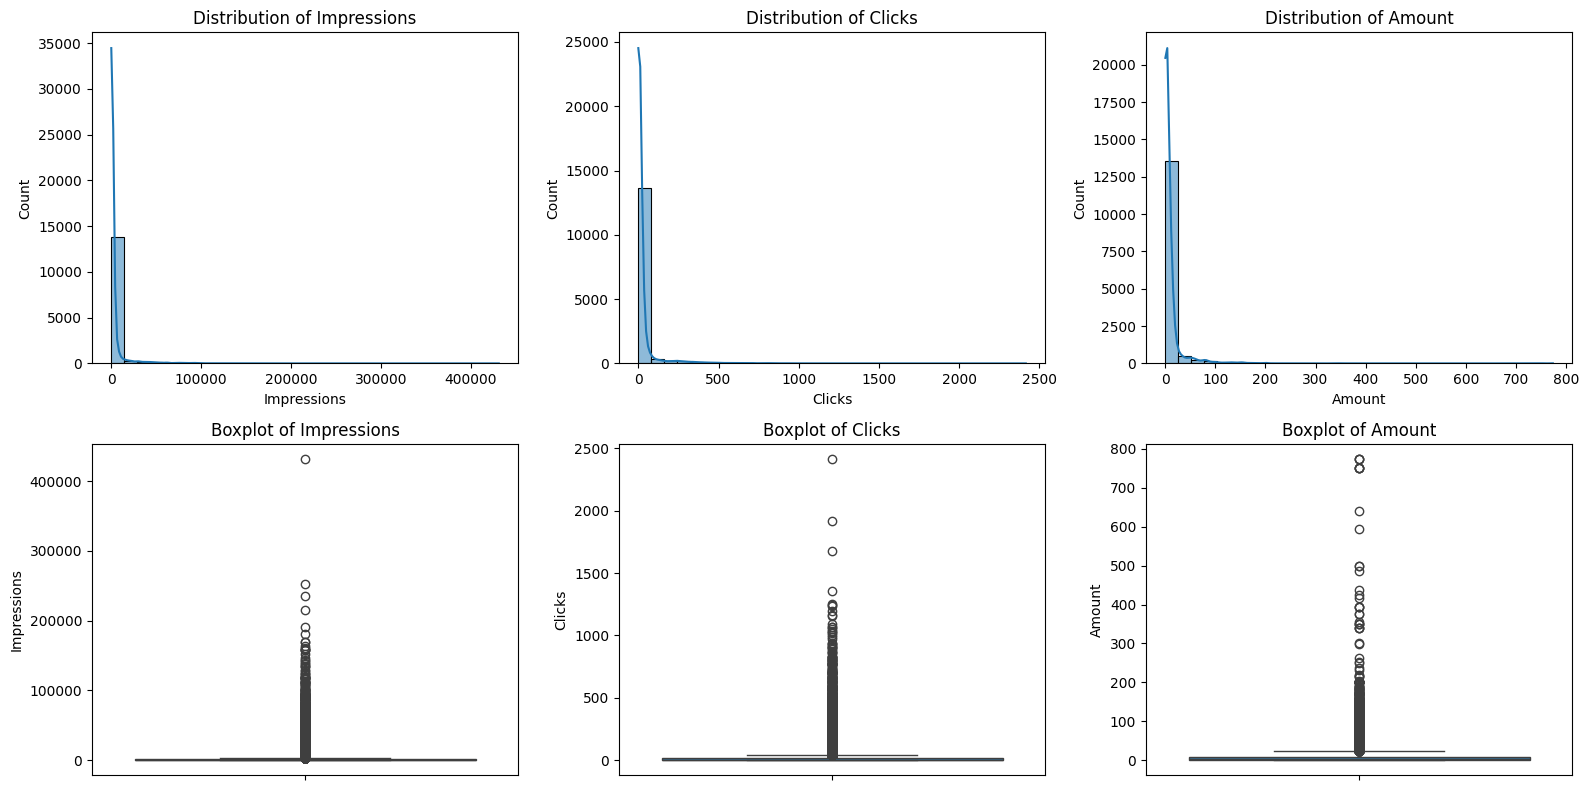

In [ ]:
# Visualizing the distribution of numerical data
plt.figure(figsize=(16, 8))

# Histogram for Impressions
plt.subplot(2, 3, 1)
sns.histplot(df_new['Impressions'], kde=True, bins=30)
plt.title('Distribution of Impressions')

# Histogram for Clicks
plt.subplot(2, 3, 2)
sns.histplot(df_new['Clicks'], kde=True, bins=30)
plt.title('Distribution of Clicks')

# Histogram for Amount
plt.subplot(2, 3, 3)
sns.histplot(df_new['Amount'], kde=True, bins=30)
plt.title('Distribution of Amount')

# Boxplot for Impressions
plt.subplot(2, 3, 4)
sns.boxplot(y=df_new['Impressions'])
plt.title('Boxplot of Impressions')

# Boxplot for Clicks
plt.subplot(2, 3, 5)
sns.boxplot(y=df_new['Clicks'])
plt.title('Boxplot of Clicks')

# Boxplot for Amount
plt.subplot(2, 3, 6)
sns.boxplot(y=df_new['Amount'])
plt.title('Boxplot of Amount')

plt.tight_layout()
plt.show()

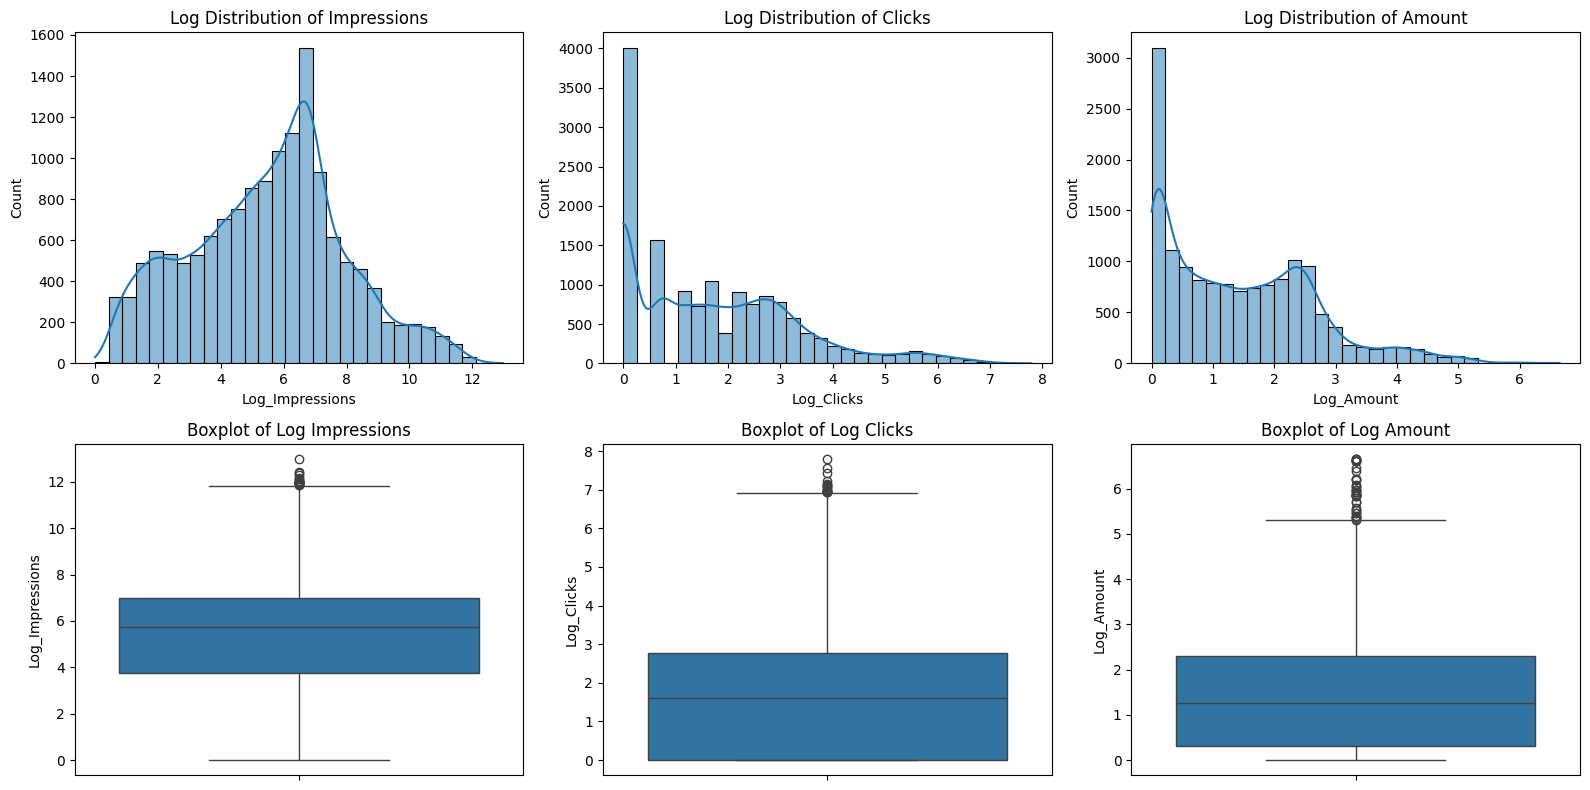

In [ ]:
# Log-transform the numerical columns (adding 1 to avoid log of zero)
df_new['Log_Impressions'] = np.log1p(df_new['Impressions'])
df_new['Log_Clicks'] = np.log1p(df_new['Clicks'])
df_new['Log_Amount'] = np.log1p(df_new['Amount'])

# Visualization of log-transformed data
plt.figure(figsize=(16, 8))

# Histogram for Log_Impressions
plt.subplot(2, 3, 1)
sns.histplot(df_new['Log_Impressions'], kde=True, bins=30)
plt.title('Log Distribution of Impressions')

# Histogram for Log_Clicks
plt.subplot(2, 3, 2)
sns.histplot(df_new['Log_Clicks'], kde=True, bins=30)
plt.title('Log Distribution of Clicks')

# Histogram for Log_Amount
plt.subplot(2, 3, 3)
sns.histplot(df_new['Log_Amount'], kde=True, bins=30)
plt.title('Log Distribution of Amount')

# Boxplot for Log_Impressions
plt.subplot(2, 3, 4)
sns.boxplot(y=df_new['Log_Impressions'])
plt.title('Boxplot of Log Impressions')

# Boxplot for Log_Clicks
plt.subplot(2, 3, 5)
sns.boxplot(y=df_new['Log_Clicks'])
plt.title('Boxplot of Log Clicks')

# Boxplot for Log_Amount
plt.subplot(2, 3, 6)
sns.boxplot(y=df_new['Log_Amount'])
plt.title('Boxplot of Log Amount')

plt.tight_layout()
plt.show()

In [ ]:
# Create groups for Impressions, Clicks, and Amount
bins_impressions = [0, 100, 1000, 10000, 100000, 431445]
bins_clicks = [0, 10, 100, 500, 1000, 2415]
bins_amount = [0, 10, 50, 100, 300, 774]

df_new['Impressions Group'] = pd.cut(df_new['Impressions'], bins=bins_impressions)
df_new['Clicks Group'] = pd.cut(df_new['Clicks'], bins=bins_clicks)
df_new['Amount Group'] = pd.cut(df_new['Amount'], bins=bins_amount)

# Create logarithmic groups
df_new['Log Impressions Group'] = pd.cut(df_new['Log_Impressions'], bins=np.log1p(bins_impressions))
df_new['Log Clicks Group'] = pd.cut(df_new['Log_Clicks'], bins=np.log1p(bins_clicks))
df_new['Log Amount Group'] = pd.cut(df_new['Log_Amount'], bins=np.log1p(bins_amount))

In [ ]:
# Grouping data with observed=False parameter
grouped_counts_impressions = df_new.groupby('Impressions Group', observed=False).agg(
    Log_Impressions_Group=('Log Impressions Group', 'first'),
    Count=('Impressions', 'count')
).reset_index()

grouped_counts_clicks = df_new.groupby('Clicks Group', observed=False).agg(
    Log_Clicks_Group=('Log Clicks Group', 'first'),
    Count=('Clicks', 'count')
).reset_index()

grouped_counts_amount = df_new.groupby('Amount Group', observed=False).agg(
    Log_Amount_Group=('Log Amount Group', 'first'),
    Count=('Amount', 'count')
).reset_index()

# Output tables
print("\nGrouped Counts: Amount")
grouped_counts_amount


Grouped Counts: Amount


,Amount Group,Log_Amount_Group,Count
0,"(0, 10]","(0.0, 2.398]",11035
1,"(10, 50]","(2.398, 3.932]",2578
2,"(50, 100]","(3.932, 4.615]",419
3,"(100, 300]","(4.615, 5.707]",209
4,"(300, 774]","(5.707, 6.653]",27


In [72]:
print("\nGrouped Counts: Clicks")
grouped_counts_clicks


Grouped Counts: Clicks


,Clicks Group,Log_Clicks_Group,Count
0,"(0, 10]","(0.0, 2.398]",5831
1,"(10, 100]","(2.398, 4.615]",3930
2,"(100, 500]","(4.615, 6.217]",722
3,"(500, 1000]","(6.217, 6.909]",132
4,"(1000, 2415]","(6.909, 7.79]",18


In [73]:
print("Grouped Counts: Impressions")
grouped_counts_impressions

Grouped Counts: Impressions


,Impressions Group,Log_Impressions_Group,Count
0,"(0, 100]","(0.0, 4.615]",5066
1,"(100, 1000]","(4.615, 6.909]",5641
2,"(1000, 10000]","(6.909, 9.21]",2970
3,"(10000, 100000]","(9.21, 11.513]",897
4,"(100000, 431445]","(11.513, 12.975]",55


## Conclusions
Mean and Median:

Mean of log-transformed data:
Log-transformed data for Impressions: ~6.04, which corresponds to approximately 419.71 in the original scale.
Log-transformed data for Clicks: ~1.39, which corresponds to approximately 4.01 clicks.
Log-transformed data for Amount: ~1.36, which corresponds to approximately 3.89 in the original scale.
Median:
Log-transformed data for Impressions: ~4.77, which is equivalent to approximately 116.12 in the original scale.
Log-transformed data for Clicks: ~1.79, which is equivalent to approximately 5.99 clicks.
Log-transformed data for Amount: ~1.75, which is equivalent to approximately 5.75 in the original scale.
Outliers:

After log transformation, outliers became less pronounced, especially for Impressions and Amount.
Despite this, Clicks still shows a significant number of outliers, as seen from the box plots, which is related to rare but substantial spikes in clicks in some campaigns.
Next Steps:

For now, we need to examine the relationships between the variables.
If you need further assistance or additional translations, feel free to ask!

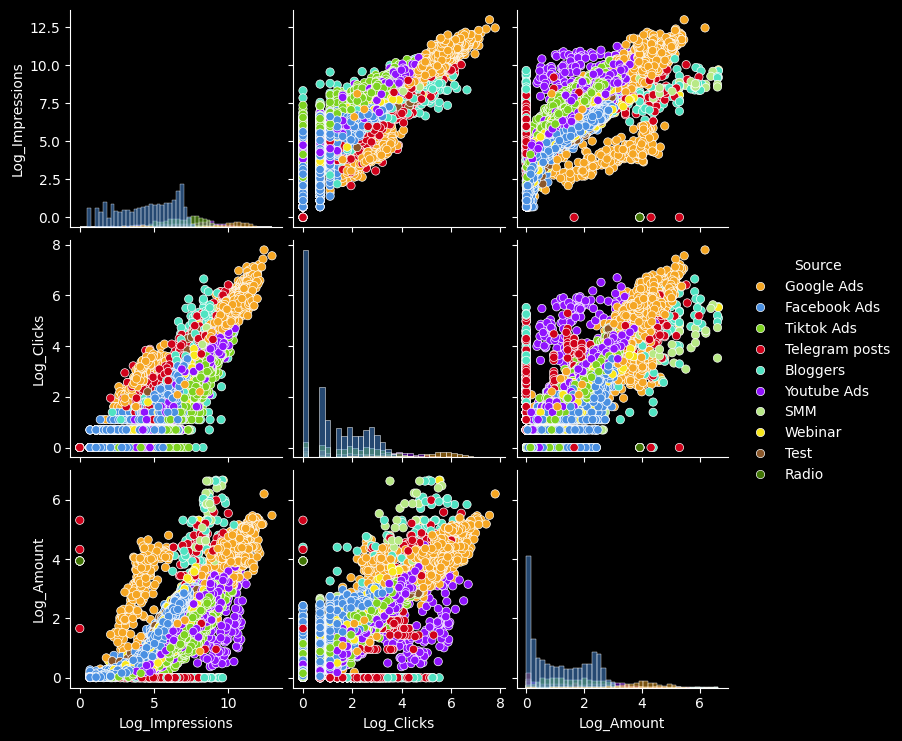

In [ ]:
import numpy as np

# Check if the necessary columns exist; if not, create logarithmic versions
if 'Log_Impressions' not in df_new.columns:
    df_new['Log_Impressions'] = np.log1p(df_new['Impressions'])  # log1p to handle 0 values

if 'Log_Clicks' not in df_new.columns:
    df_new['Log_Clicks'] = np.log1p(df_new['Clicks'])

if 'Log_Amount' not in df_new.columns:
    df_new['Log_Amount'] = np.log1p(df_new['Amount'])

# Now plot again
sns.pairplot(df_new[['Log_Impressions', 'Log_Clicks', 'Log_Amount', 'Source']], diag_kind="hist", hue='Source', palette=palette)

# Set axis colors, labels, and scales
plt.gcf().set_facecolor('black')  # Set the figure background to black
for ax in plt.gcf().axes:
    ax.tick_params(colors='white')  # Set tick colors
    ax.xaxis.label.set_color('white')  # Set x-axis label color
    ax.yaxis.label.set_color('white')  # Set y-axis label color

plt.show()

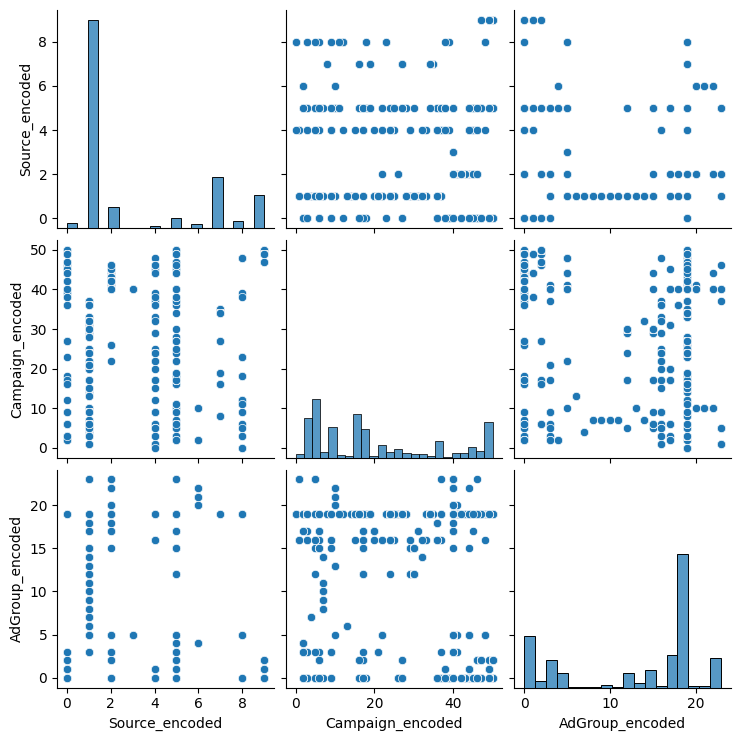

In [ ]:
# Copy the dataframe to avoid changing the original
df_encoded = df_new.copy()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
df_encoded['Source_encoded'] = label_encoder.fit_transform(df_encoded['Source'])
df_encoded['Campaign_encoded'] = label_encoder.fit_transform(df_encoded['Campaign'])
df_encoded['AdGroup_encoded'] = label_encoder.fit_transform(df_encoded['AdGroup'])

# Plot a pairplot for the encoded categorical variables
sns.pairplot(df_encoded[['Source_encoded', 'Campaign_encoded', 'AdGroup_encoded']])
plt.show()

## Conclusions
Logarithmic Quantitative Variables:

Impressions, Clicks, and Amount show a strong correlation with each other, particularly between Impressions and Clicks, indicating a dependency between the number of impressions and clicks. This is logical, as a higher number of impressions often leads to an increase in clicks.
There is also a dependency between Log_Amount and the other quantitative variables (Log_Impressions, Log_Clicks), suggesting that as impressions and clicks increase, expenditures (Amount) also rise.
Categorical Variables:

Source, Campaign, and AdGroup exhibit distributions, but there is no clear dependency with other variables. They are primarily distributed across groups and can be used for deeper segmentation, such as further analysis of campaigns and advertising sources.
The visualization of categorical variables highlights the main groups actively participating in advertising campaigns. However, it is also important to note that these categories alone do not demonstrate quantitative dependency.
If you need further assistance or additional translations, feel free to ask!

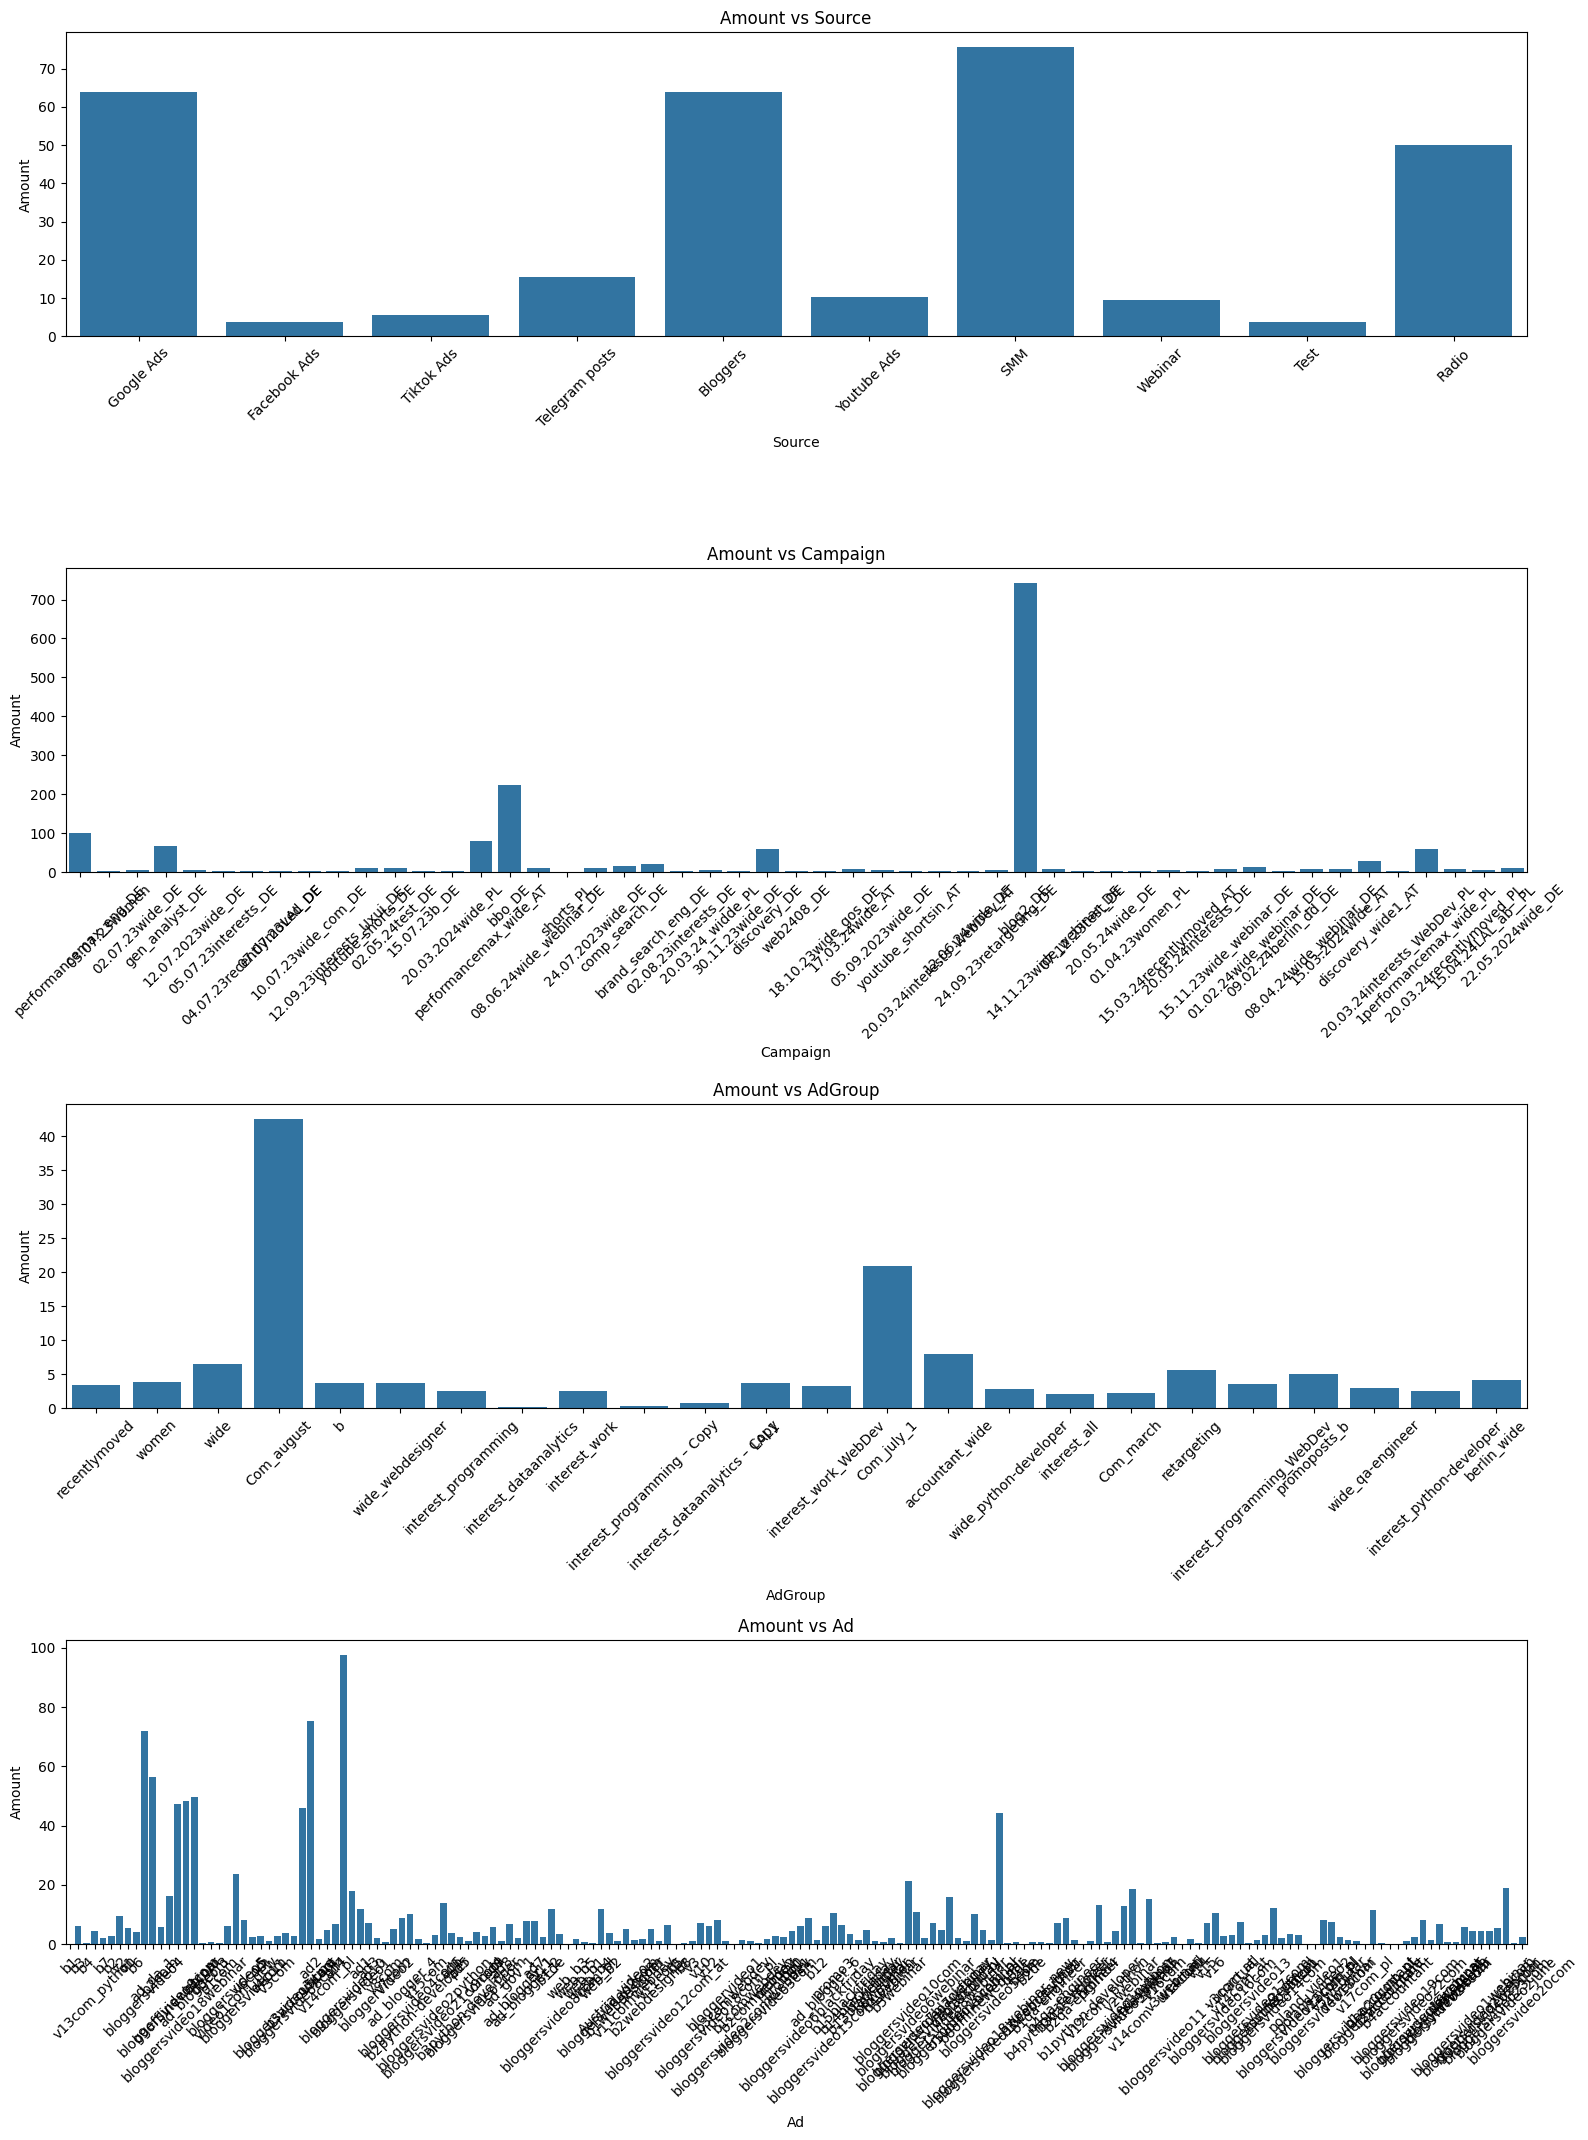

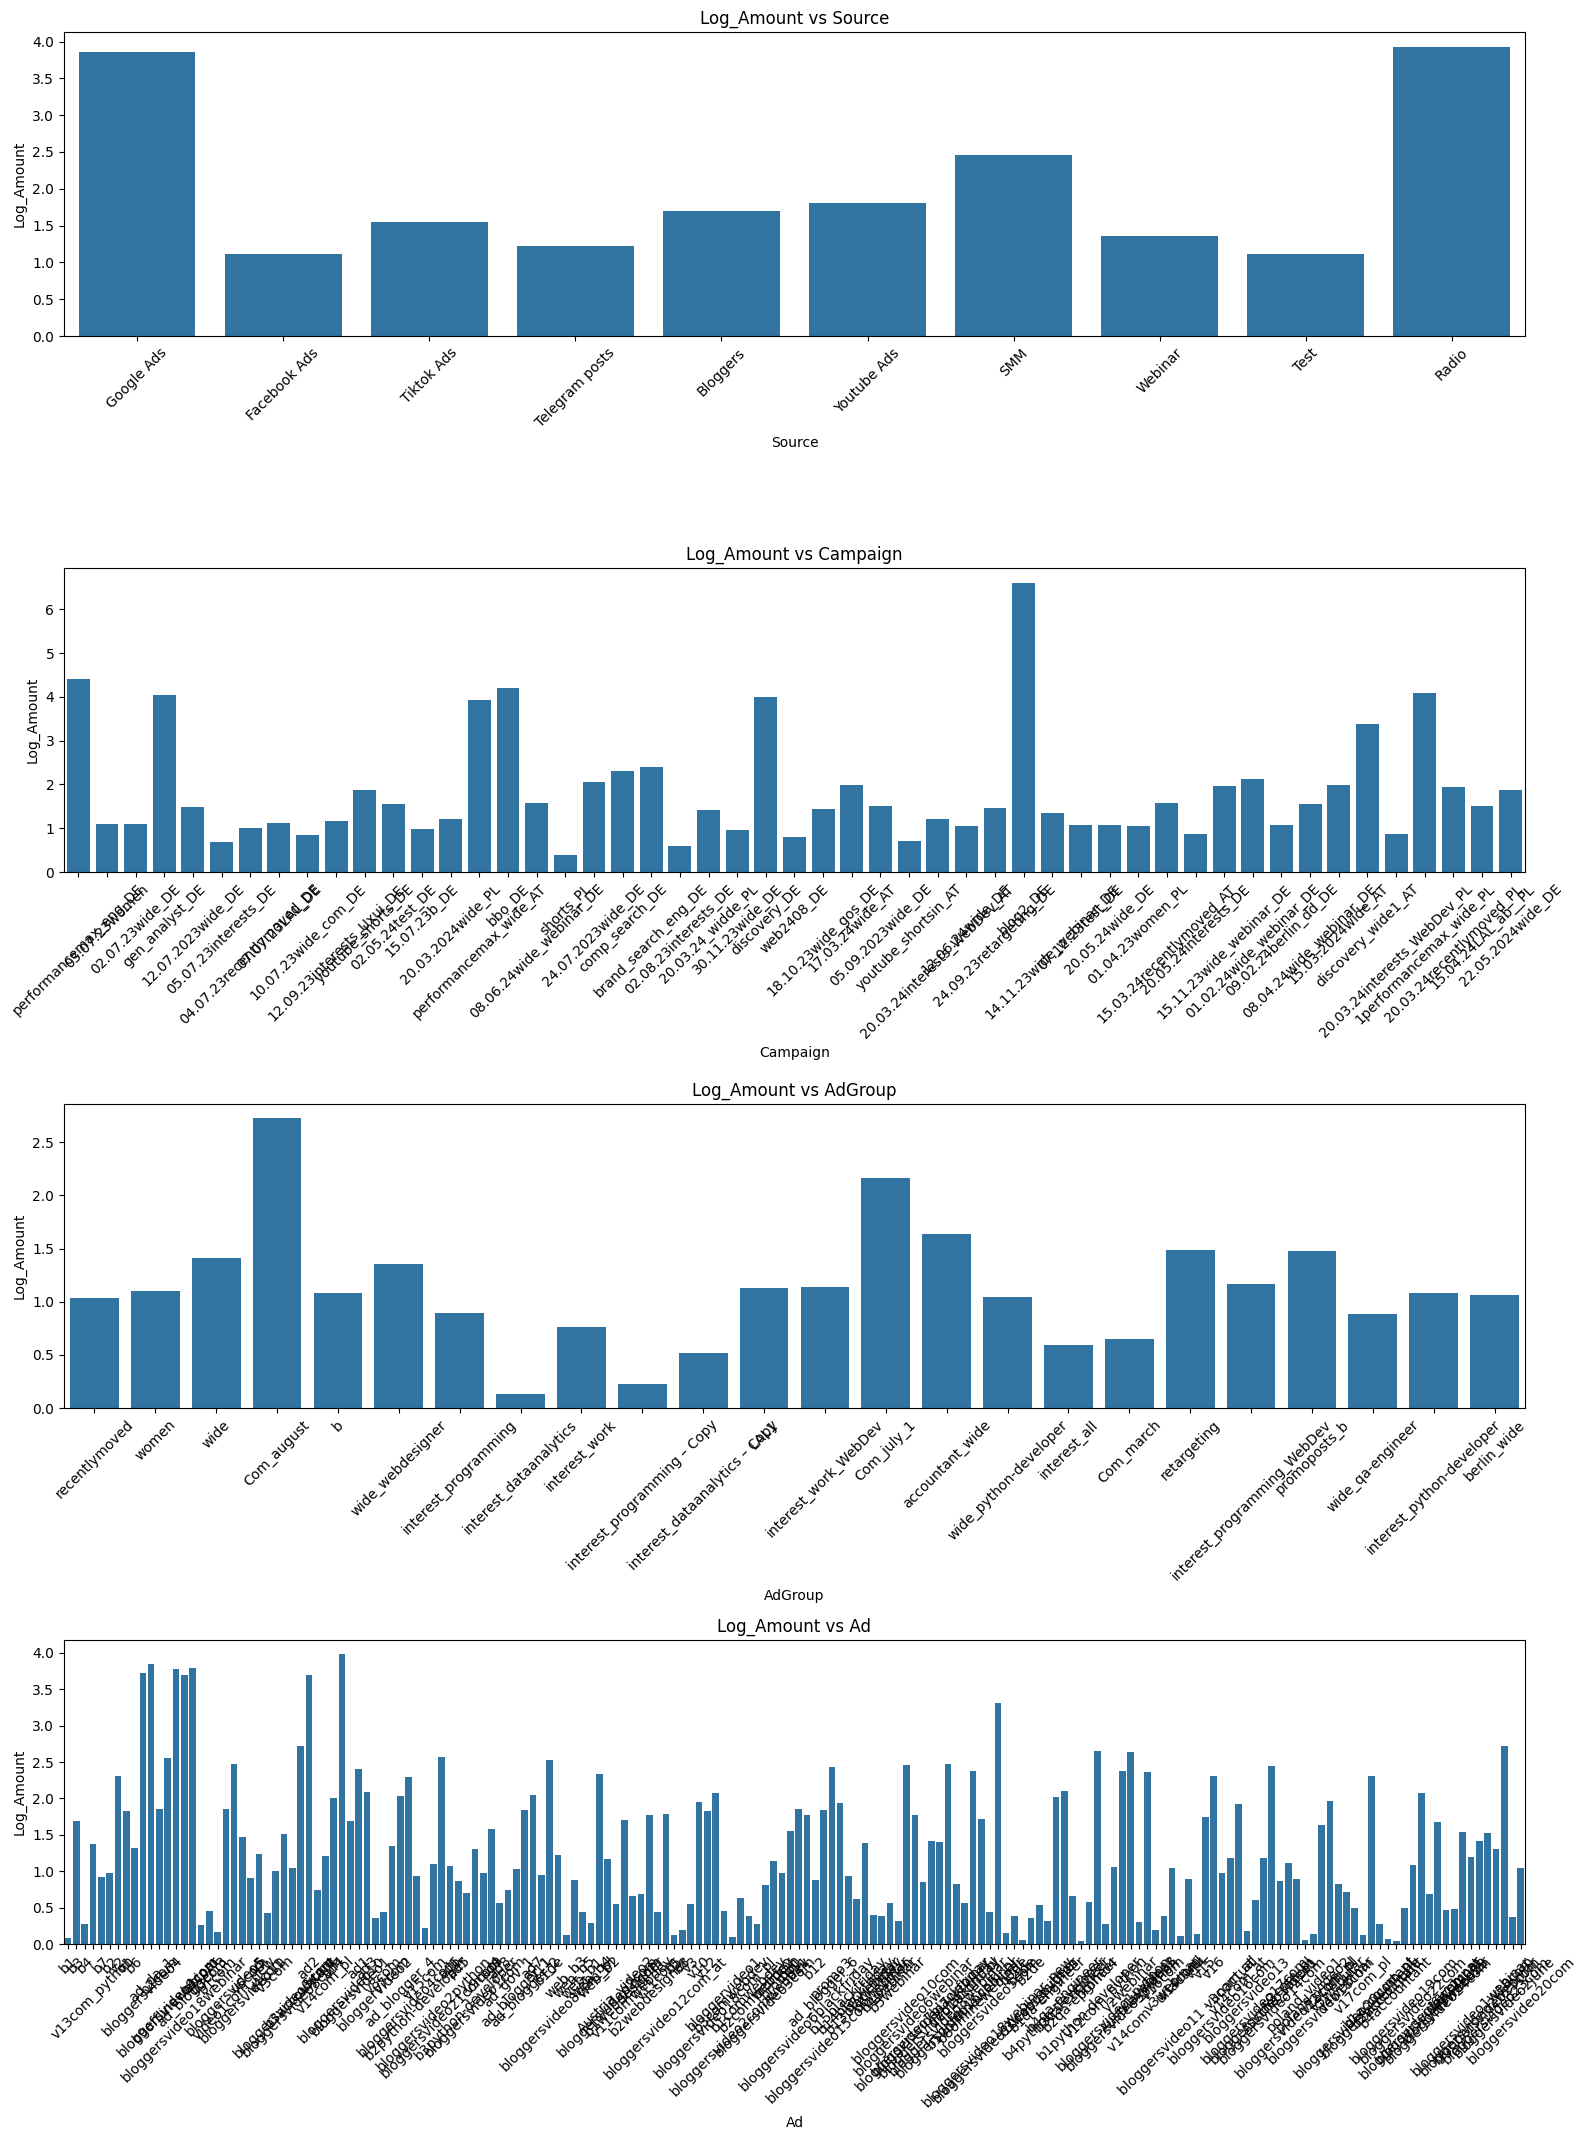

In [ ]:
# Select categorical variables for analysis
selected_categorical_columns = ['Source', 'Campaign', 'AdGroup', 'Ad']

# Plot bar charts for campaign costs
plt.figure(figsize=(16, 25))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(len(selected_categorical_columns) + 1, 1, i)
    sns.barplot(x=col, y='Amount', data=df_new, errorbar=None)
    plt.title(f'Amount vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze the logarithm of costs
plt.figure(figsize=(16, 25))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(len(selected_categorical_columns) + 1, 1, i)
    sns.barplot(x=col, y='Log_Amount', data=df_new, errorbar=None)
    plt.title(f'Log_Amount vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusions
Dependence of Log_Amount on AdGroup and Ad: Some groups (e.g., "Com_august" and "accountant_wide") stand out in terms of spending, which may indicate the high efficiency of these campaigns or a large budget allocated to them.

The "Ad" variable also shows significant differences in costs, suggesting the need for a more detailed analysis of each advertisement.

Dependence of Log_Amount on Source: Google Ads and Radio sources show the highest expenditures, which may indicate the importance of these channels for advertising campaigns. SMM and YouTube Ads also have significant investments.

This is useful for evaluating the effectiveness of channels, especially when linking expenditures with campaign results (e.g., click counts or impressions).

Dependence of Log_Amount on Campaign and AdGroup: Certain campaigns (e.g., "14.11.23webinar_DE") are distinguished by their substantial costs. This could be related to seasonal campaigns or significant events.

AdGroups with high spending may be targeted for optimization or performance analysis based on KPIs.

Dependence of Log_Amount on Impressions and Clicks: The graph indicates that Impressions and Clicks exhibit different spending patterns, where campaigns with large impressions and clicks may have varying levels of expenditures.

If you need further translations or any other assistance, feel free to ask!

In [ ]:
# Function to find outlier boundaries
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate outlier boundaries for Impressions, Clicks, and Amount
impressions_lower, impressions_upper = detect_outliers_iqr(df_new, 'Impressions')
clicks_lower, clicks_upper = detect_outliers_iqr(df_new, 'Clicks')
amount_lower, amount_upper = detect_outliers_iqr(df_new, 'Amount')

# Filter outliers
impressions_outliers = df_new[(df_new['Impressions'] < impressions_lower) | (df_new['Impressions'] > impressions_upper)]
clicks_outliers = df_new[(df_new['Clicks'] < clicks_lower) | (df_new['Clicks'] > clicks_upper)]
amount_outliers = df_new[(df_new['Amount'] < amount_lower) | (df_new['Amount'] > amount_upper)]

# Output results
print(f"Outliers for Impressions: {len(impressions_outliers)} records")
print(f"Outliers for Clicks: {len(clicks_outliers)} records")
print(f"Outliers for Amount: {len(amount_outliers)} records")

Выбросы по Impressions: 2220 записей
Выбросы по Clicks: 1684 записей
Выбросы по Amount: 1217 записей


In [ ]:
# Grouping outliers by campaigns, sources, and AdGroup for Impressions
impressions_outliers_grouped = impressions_outliers.groupby(['Campaign', 'Source', 'AdGroup']).size().reset_index(name='Count')
clicks_outliers_grouped = clicks_outliers.groupby(['Campaign', 'Source', 'AdGroup']).size().reset_index(name='Count')
amount_outliers_grouped = amount_outliers.groupby(['Campaign', 'Source', 'AdGroup']).size().reset_index(name='Count')

# Output results
print("\nOutliers for Impressions (grouped by campaigns, sources, and AdGroup):")
display(impressions_outliers_grouped.sort_values(by='Count', ascending=False).head())

print("\nOutliers for Clicks (grouped by campaigns, sources, and AdGroup):")
display(clicks_outliers_grouped.sort_values(by='Count', ascending=False).head())

print("\nOutliers for Amount (grouped by campaigns, sources, and AdGroup):")
display(amount_outliers_grouped.sort_values(by='Count', ascending=False).head())


Выбросы по Impressions (группировка по кампаниям, источникам и AdGroup):


,Campaign,Source,AdGroup,Count
58,youtube_shorts_DE,Youtube Ads,Com_august,621
9,12.07.2023wide_DE,Tiktok Ads,wide,408
41,performancemax_eng_DE,Google Ads,Com_august,349
31,discovery_DE,Google Ads,Com_august,162
17,20.03.2024wide_PL,Tiktok Ads,wide,133



Выбросы по Clicks (группировка по кампаниям, источникам и AdGroup):


,Campaign,Source,AdGroup,Count
75,youtube_shorts_DE,Youtube Ads,Com_august,448
60,performancemax_eng_DE,Google Ads,Com_august,347
49,discovery_DE,Google Ads,Com_august,162
28,12.07.2023wide_DE,Tiktok Ads,wide,154
65,performancemax_wide_AT,Google Ads,Com_august,75



Выбросы по Amount (группировка по кампаниям, источникам и AdGroup):


,Campaign,Source,AdGroup,Count
43,performancemax_eng_DE,Google Ads,Com_august,346
59,youtube_shorts_DE,Youtube Ads,Com_august,198
30,discovery_DE,Google Ads,Com_august,159
26,brand_search_eng_DE,Google Ads,wide,67
47,performancemax_wide_AT,Google Ads,Com_august,67


In [ ]:
# Grouping data by campaigns and AdGroup, then calculating average and median values for metrics.
grouped_stats = df_new.groupby(['Campaign', 'AdGroup']).agg(
    avg_impressions=('Impressions', 'mean'),
    median_impressions=('Impressions', 'median'),
    avg_clicks=('Clicks', 'mean'),
    median_clicks=('Clicks', 'median'),
    avg_amount=('Amount', 'mean'),
    median_amount=('Amount', 'median')
).reset_index()

# Merging the original data with the calculated statistics
df_new = df_new.merge(grouped_stats, on=['Campaign', 'AdGroup'], how='left')

# Comparing current values of Impressions, Clicks, and Amount with their average and median values
df_new['impressions_diff'] = df_new['Impressions'] / df_new['avg_impressions']
df_new['clicks_diff'] = df_new['Clicks'] / df_new['avg_clicks']
df_new['amount_diff'] = df_new['Amount'] / df_new['avg_amount']

In [ ]:
# Setting a threshold for deviations, for example, outliers will be considered those that are more than 2 times the average values
threshold = 2

# Filtering outliers for Impressions, Clicks, and Amount
outliers = df_new[(df_new['impressions_diff'] > threshold) |
                  (df_new['clicks_diff'] > threshold) |
                  (df_new['amount_diff'] > threshold)]

# Displaying the found outliers
outliers[['Date', 'Campaign', 'AdGroup', 'Impressions', 'Clicks', 'Amount', 'impressions_diff', 'clicks_diff', 'amount_diff']]

,Date,Campaign,AdGroup,Impressions,Clicks,Amount,impressions_diff,clicks_diff,amount_diff
14,2023-07-04,03.07.23women,women,766.0,15,11.02,2.433391,2.302306,2.898772
16,2023-07-04,02.07.23wide_DE,wide,1077.0,34,15.53,2.899294,5.199296,3.602606
22,2023-07-05,03.07.23women,women,741.0,20,10.84,2.353972,3.069742,2.851423
26,2023-07-05,12.07.2023wide_DE,wide,4413.0,12,14.69,2.433101,0.939055,2.836834
28,2023-07-05,02.07.23wide_DE,wide,866.0,27,15.02,2.331280,4.128853,3.484297
...,...,...,...,...,...,...,...,...,...
14590,2024-06-20,12.07.2023wide_DE,wide,5440.0,19,11.32,2.999336,1.486838,2.186043
14592,2024-06-20,07.07.23LAL_DE,LAL1,1131.0,24,16.26,3.838334,4.700565,4.416286
14596,2024-06-20,15.07.23b_DE,b,43.0,4,1.93,0.415264,2.367531,0.801406
14619,2024-06-21,brand_search_eng_DE,b,0.0,0,50.00,0.000000,0.000000,3.635130


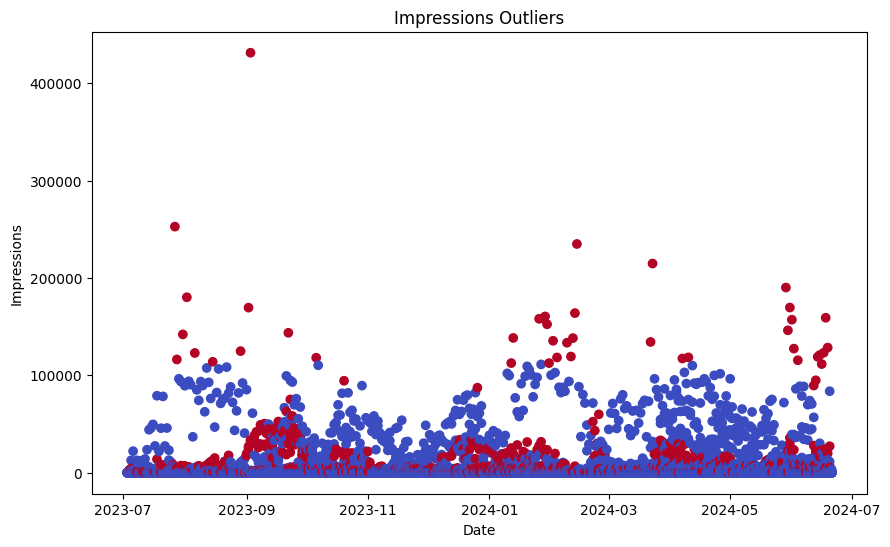

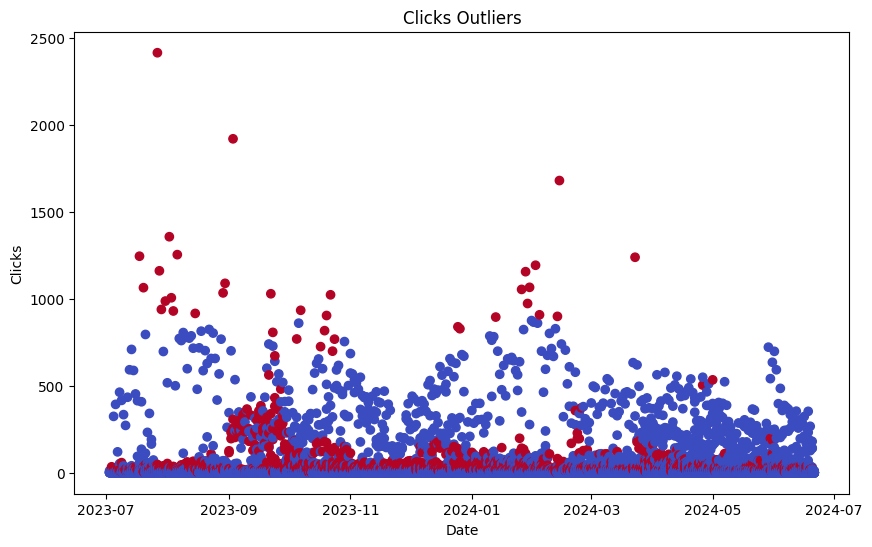

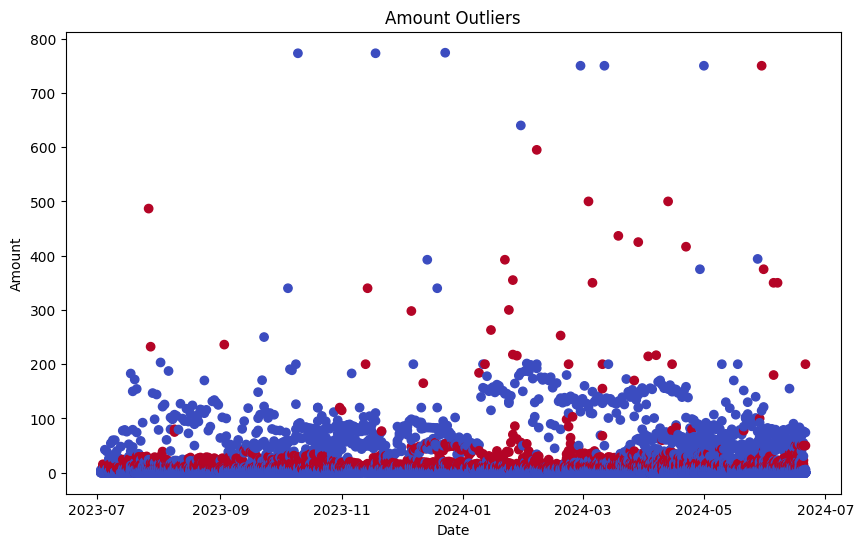

In [ ]:
# Plotting outliers for Impressions
plt.figure(figsize=(10, 6))
plt.scatter(df_new['Date'], df_new['Impressions'], c=df_new['impressions_diff'] > threshold, cmap='coolwarm')
plt.title('Impressions Outliers')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.show()

# The same for Clicks and Amount
plt.figure(figsize=(10, 6))
plt.scatter(df_new['Date'], df_new['Clicks'], c=df_new['clicks_diff'] > threshold, cmap='coolwarm')
plt.title('Clicks Outliers')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_new['Date'], df_new['Amount'], c=df_new['amount_diff'] > threshold, cmap='coolwarm')
plt.title('Amount Outliers')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Filtering outliers by Impressions
impressions_outliers = df_new[df_new['Impressions'] > 200100]  # threshold value for outliers from the plot

# Filtering outliers by Clicks
clicks_outliers = df_new[df_new['Clicks'] > 1100]  # threshold value for outliers from the plot

# Filtering outliers by Amount
amount_outliers = df_new[df_new['Amount'] > 300]  # threshold value for outliers from the plot

# Displaying results
impressions_outliers[['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 'Amount']]

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount
636,2023-07-27,Google Ads,performancemax_eng_DE,252824.0,2415,Com_august,bloggersvideo10,486.77
2133,2023-09-03,Google Ads,performancemax_eng_DE,431445.0,1920,Com_august,bloggersvideo10,236.10
8351,2024-02-14,Google Ads,performancemax_eng_DE,234984.0,1680,Com_august,bloggersvideo10,176.03
9829,2024-03-23,Google Ads,performancemax_eng_DE,214875.0,1239,Com_august,bloggersvideo10,172.66


In [83]:
clicks_outliers[['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 'Amount']]

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount
298,2023-07-18,Google Ads,performancemax_eng_DE,79082.0,1245,Com_august,bloggersvideo10,182.81
636,2023-07-27,Google Ads,performancemax_eng_DE,252824.0,2415,Com_august,bloggersvideo10,486.77
670,2023-07-28,Google Ads,performancemax_eng_DE,116350.0,1161,Com_august,bloggersvideo10,232.24
867,2023-08-02,Google Ads,performancemax_eng_DE,180251.0,1357,Com_august,bloggersvideo10,203.23
1048,2023-08-06,Google Ads,performancemax_eng_DE,122999.0,1254,Com_august,bloggersvideo10,187.46
2133,2023-09-03,Google Ads,performancemax_eng_DE,431445.0,1920,Com_august,bloggersvideo10,236.10
7628,2024-01-28,Google Ads,performancemax_eng_DE,158410.0,1156,Com_august,bloggersvideo10,215.67
7815,2024-02-02,Google Ads,performancemax_eng_DE,135542.0,1193,Com_august,bloggersvideo10,201.25
8351,2024-02-14,Google Ads,performancemax_eng_DE,234984.0,1680,Com_august,bloggersvideo10,176.03
9829,2024-03-23,Google Ads,performancemax_eng_DE,214875.0,1239,Com_august,bloggersvideo10,172.66


In [84]:
amount_outliers[['Date', 'Source', 'Campaign', 'Impressions', 'Clicks', 'AdGroup', 'Ad', 'Amount']]

,Date,Source,Campaign,Impressions,Clicks,AdGroup,Ad,Amount
636,2023-07-27,Google Ads,performancemax_eng_DE,252824.000000,2415,Com_august,bloggersvideo10,486.77
3541,2023-10-05,Bloggers,bbo_DE,4301.000000,769,Com_august,bloggersvideo10,340.00
3747,2023-10-10,Bloggers,blog2_DE,9797.000000,257,Com_august,bloggersvideo10,773.00
4901,2023-11-14,Bloggers,performancemax_eng_DE,5878.000000,465,Com_august,bloggersvideo10,340.00
5014,2023-11-18,Webinar,blog2_DE,16100.000000,249,Com_august,bloggersvideo4,773.00
5798,2023-12-14,Bloggers,bbo_DE,4176.000000,327,Com_august,bloggersvideo10,392.50
5973,2023-12-19,Bloggers,bbo_DE,5176.000000,182,Com_august,bloggersvideo10,340.00
6134,2023-12-23,Bloggers,blog2_DE,15001.000000,164,Com_august,bloggersvideo4,774.00
7355,2024-01-22,Bloggers,performancemax_wide_AT,18025.000000,112,Com_august,bloggersvideo9com,392.50
7528,2024-01-26,Bloggers,performancemax_eng_DE,18751.000000,349,Com_august,bloggersvideo10,355.00


## Выводы

Выбросы не выглядят как аномальные и имеют свои закономерности. нет четкого понимания что выбросы ошибычное это могли быть акционные крупные рекламные компании

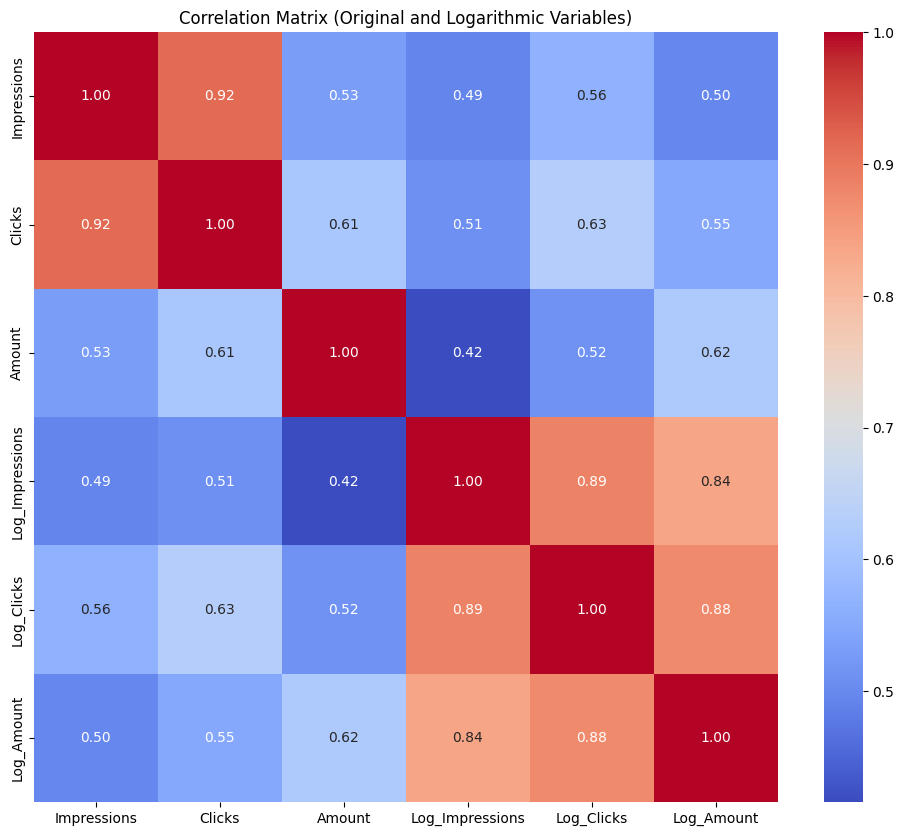

In [ ]:
# Calculating the correlation matrix for numerical and logarithmic variables
numerical_columns_log = ['Impressions', 'Clicks', 'Amount', 'Log_Impressions', 'Log_Clicks', 'Log_Amount']
correlation_matrix_log = df_new[numerical_columns_log].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Original and Logarithmic Variables)')
plt.show()

## Conclusions
The correlation between logarithmic values turned out to be quite informative, especially for understanding the relationships between Impressions, Clicks, and Amount. Logarithmization clarified these dependencies.

This confirms that logarithmization helped make the data more suitable for further analysis and revealed significant relationships among the key variables.

In [ ]:
# List of columns to drop
columns_to_drop = [
    'Currency', 'Campaign_encoded', 'AdGroup_encoded', 'Ad_encoded', 
    'Log_Impressions', 'Log_Clicks', 'Log_Amount', 'Impressions Group', 
    'Clicks Group', 'Amount Group', 'Log Impressions Group', 'Log Clicks Group', 
    'Log Amount Group', 'avg_impressions', 'median_impressions', 'avg_clicks', 
    'median_clicks', 'avg_amount', 'median_amount', 'impressions_diff', 
    'clicks_diff', 'amount_diff'
]

# Dropping columns
df_new = df_new.drop(columns=columns_to_drop)